In [1]:
import numpy as np
import math
import os
import random
import rasterio
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 1. Перебор параметров окна -check-
# 2. Сохранять в текст результаты фильтрации -check-
# 3. Добавить зашумление через numpy.random.uniform [-0.5, 0.5] -check-

In [2]:
R = 50

arr_sph = np.zeros((2*R+1, 2*R+1), dtype = 'float')
nrows = arr_sph.shape[0]
ncols = arr_sph.shape[1]
#arr1

In [3]:
ncols

101

In [4]:
#hemisphere
for x in range(nrows):
    for y in range(ncols):
        try:
            z = math.sqrt(-(float(x)-R)**2 - (float(y)-R)**2 + R**2)
            arr_sph[x][y] = z
        except ValueError:
            pass

print(np.array_str(arr_sph, precision=1))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
print(np.max(arr_sph), np.min(arr_sph))

50.0 0.0


In [6]:
# Noising
dict_ns = {}
arr_n = np.random.randn(nrows, ncols)  # standard normal distribution
arr_sph_n = arr_sph + arr_n
arr_sph_n_2 = arr_sph + arr_n * 2
arr_sph_n_05 = arr_sph + arr_n * 0.5

arr_un = np.random.uniform(-1, 1, (nrows, ncols))  # uniform distribution
arr_sph_un = arr_sph + arr_un
arr_sph_un_2 = arr_sph + arr_un * 2
arr_sph_un_05 = arr_sph + arr_un * 0.5

dict_ns['sph_n_1'], dict_ns['sph_n_05'], dict_ns['sph_n_2'], \
dict_ns['sph_un_1'], dict_ns['sph_un_05'], dict_ns['sph_un_2'] = \
arr_sph_n, arr_sph_n_05, arr_sph_n_2, arr_sph_un, arr_sph_un_05, arr_sph_un_2

dict_ns

{'sph_n_1': array([[-1.39347036e+00,  4.06430658e-01, -5.04161051e-01, ...,
          9.09525423e-02,  1.30476719e+00,  2.03379557e-01],
        [-5.54945366e-02, -1.26388302e-03,  5.67548213e-02, ...,
          8.68115074e-01,  6.01880219e-01,  1.06819758e+00],
        [-5.33680688e-01,  1.16864455e+00,  8.00643603e-01, ...,
         -1.02461841e+00,  1.88102810e-01,  1.48708137e-01],
        ...,
        [ 9.37308287e-01, -3.79491883e-01,  1.60639399e+00, ...,
          2.75534744e-01, -5.92819497e-02, -8.62104130e-01],
        [-3.93533885e-01,  1.27839711e+00,  1.05074320e+00, ...,
          7.56401734e-01,  1.30200829e+00,  4.31666568e-01],
        [ 3.73868408e-03, -2.74923639e+00,  3.60462467e-01, ...,
         -5.48858311e-01, -6.98301423e-02,  1.36953955e+00]]),
 'sph_n_05': array([[-6.96735178e-01,  2.03215329e-01, -2.52080525e-01, ...,
          4.54762711e-02,  6.52383595e-01,  1.01689779e-01],
        [-2.77472683e-02, -6.31941508e-04,  2.83774107e-02, ...,
          4.340

In [7]:
print(np.max(arr_sph), np.min(arr_sph), '\n')

print(np.max(arr_n), np.min(arr_n), '\n')
print(np.max(arr_sph_n_05), np.min(arr_sph_n_05))
print(np.max(arr_sph_n), np.min(arr_sph_n))
print(np.max(arr_sph_n_2), np.min(arr_sph_n_2), '\n')

print(np.max(arr_sph_un_05), np.min(arr_sph_un_05))
print(np.max(arr_sph_un), np.min(arr_sph_un))
print(np.max(arr_sph_un_2), np.min(arr_sph_un_2))

50.0 0.0 

4.060974868923597 -3.9283752013806095 

51.29632749500756 -1.5442818290062181
52.79305659806019 -3.0885636580124363
55.78651480416545 -6.1771273160248725 

50.4709170043664 -0.4996082386885289
50.95183500893284 -0.9992164773770578
51.91367101806573 -1.9984329547541155


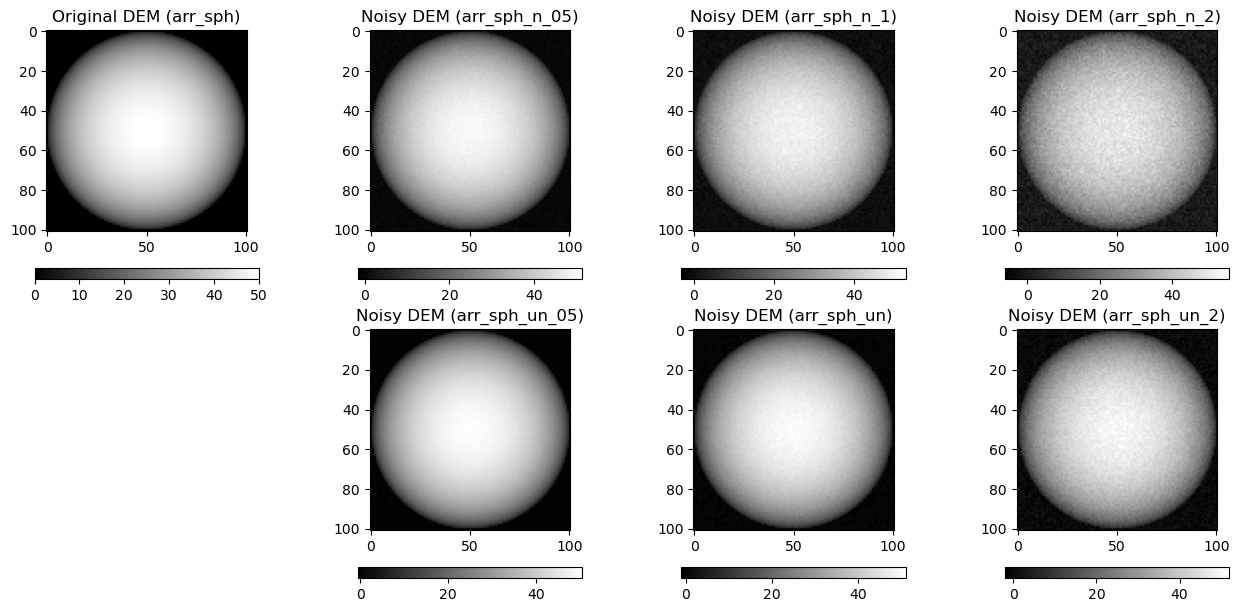

In [9]:
#Vis
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(3, 4, 1)
ax1.set_title('Original DEM (arr_sph)')
plt.imshow(arr_sph, cmap='binary_r')
plt.colorbar(fraction=0.045, orientation='horizontal')
# plt.contourf(arr_sph)

ax2 = fig.add_subplot(3, 4, 2)
ax2.set_title('Noisy DEM (arr_sph_n_05)')
plt.imshow(arr_sph_n_05, cmap='binary_r')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax3 = fig.add_subplot(3, 4, 3)
ax3.set_title('Noisy DEM (arr_sph_n_1)')
plt.imshow(arr_sph_n, cmap='binary_r')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax4 = fig.add_subplot(3, 4, 4)
ax4.set_title('Noisy DEM (arr_sph_n_2)')
plt.imshow(arr_sph_n_2, cmap='binary_r')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax5 = fig.add_subplot(3, 4, 6)
ax5.set_title('Noisy DEM (arr_sph_un_05)')
plt.imshow(arr_sph_un_05, cmap='binary_r')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax6 = fig.add_subplot(3, 4, 7)
ax6.set_title('Noisy DEM (arr_sph_un)')
plt.imshow(arr_sph_un, cmap='binary_r')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax7 = fig.add_subplot(3, 4, 8)
ax7.set_title('Noisy DEM (arr_sph_un_2)')
plt.imshow(arr_sph_un_2, cmap='binary_r')
plt.colorbar(fraction=0.045, orientation='horizontal')

plt.savefig('vis_hemisphere.png')

plt.show()

In [10]:
# Saving the arrays as a geotiff files
# Jupyter Notebook must be run in administrator mode to be able to overwrite rasters

transform = rasterio.transform.from_origin(0, 0, 1, 1)
crs = rasterio.crs.CRS.from_epsg(4326)

data = arr_sph

with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\clear\hemisphere_clear.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)
    

for _ in dict_ns:
    data = dict_ns[_]
    output_path = r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\\hemisphere" + _[3:] + ".tif"

    with rasterio.open(output_path, 
                       'w', 
                       driver='GTiff', 
                       width=data.shape[1], 
                       height=data.shape[0], 
                       count=1, 
                       dtype=str(data.dtype), 
                       crs=crs, 
                       transform=transform, 
                       overwrite=True) as dst:
        dst.write(data, 1)

C:\Users\sasha\anaconda3\envs\dem-filter\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


In [13]:
#hemicylinder
R = 30

arr_cyl = np.zeros((int(2*R), int(2*R)+1), dtype = 'float')
nrows = arr_cyl.shape[0]
ncols = arr_cyl.shape[1]


for x in range(nrows):
    for y in range(ncols):
        z = math.sqrt(R**2 - (float(y)-R)**2)
        arr_cyl[x][y] = R - z

#arr_c

In [14]:
np.max(arr_cyl)

30.0

In [15]:
# Noising
dict_nc = {}
arr_n = np.random.randn(nrows, ncols) # standart normal distribution
arr_cyl_n = arr_cyl + arr_n
arr_cyl_n_2 = arr_cyl + arr_n * 2
arr_cyl_n_05 = arr_cyl + arr_n * 0.5

arr_un = np.random.uniform(-1, 1, (nrows, ncols))  # uniform distribution
arr_cyl_un = arr_cyl + arr_un
arr_cyl_un_2 = arr_cyl + arr_un * 2
arr_cyl_un_05 = arr_cyl + arr_un * 0.5

dict_nc['cyl_n_1'], dict_nc['cyl_n_05'], dict_nc['cyl_n_2'], \
dict_nc['cyl_un_1'], dict_nc['cyl_un_05'], dict_nc['cyl_un_2'] = \
arr_cyl_n, arr_cyl_n_05, arr_cyl_n_2, arr_cyl_un, arr_cyl_un_05, arr_cyl_un_2

dict_ns

{'sph_n_1': array([[-1.39347036e+00,  4.06430658e-01, -5.04161051e-01, ...,
          9.09525423e-02,  1.30476719e+00,  2.03379557e-01],
        [-5.54945366e-02, -1.26388302e-03,  5.67548213e-02, ...,
          8.68115074e-01,  6.01880219e-01,  1.06819758e+00],
        [-5.33680688e-01,  1.16864455e+00,  8.00643603e-01, ...,
         -1.02461841e+00,  1.88102810e-01,  1.48708137e-01],
        ...,
        [ 9.37308287e-01, -3.79491883e-01,  1.60639399e+00, ...,
          2.75534744e-01, -5.92819497e-02, -8.62104130e-01],
        [-3.93533885e-01,  1.27839711e+00,  1.05074320e+00, ...,
          7.56401734e-01,  1.30200829e+00,  4.31666568e-01],
        [ 3.73868408e-03, -2.74923639e+00,  3.60462467e-01, ...,
         -5.48858311e-01, -6.98301423e-02,  1.36953955e+00]]),
 'sph_n_05': array([[-6.96735178e-01,  2.03215329e-01, -2.52080525e-01, ...,
          4.54762711e-02,  6.52383595e-01,  1.01689779e-01],
        [-2.77472683e-02, -6.31941508e-04,  2.83774107e-02, ...,
          4.340

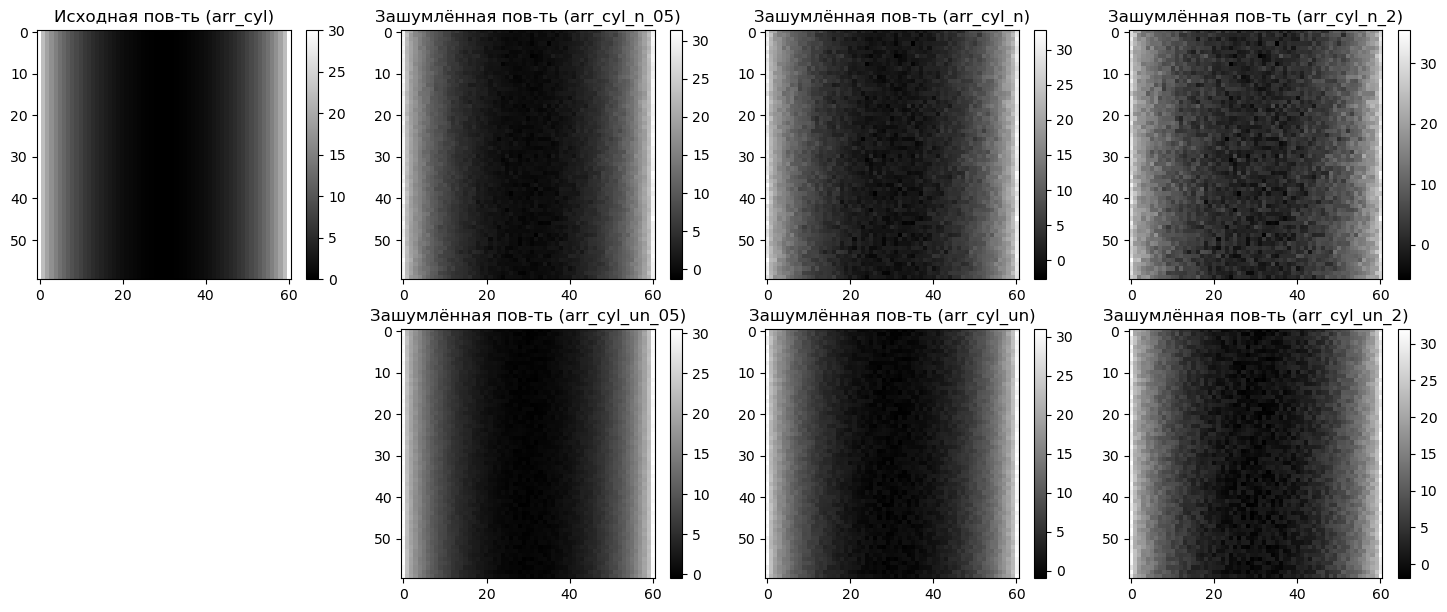

In [28]:
#Vis
fig = plt.figure(figsize=(18, 11))

ax1 = fig.add_subplot(3, 4, 1)
ax1.set_title('Исходная пов-ть (arr_cyl)')
plt.imshow(arr_cyl, cmap='binary_r')
plt.colorbar(fraction=0.065)
# plt.contour(arr_cyl, colors='red')

ax2 = fig.add_subplot(3, 4, 2)
ax2.set_title('Зашумлённая пов-ть (arr_cyl_n_05)')
plt.imshow(arr_cyl_n_05, cmap='binary_r')
plt.colorbar(fraction=0.065)

ax3 = fig.add_subplot(3, 4, 3)
ax3.set_title('Зашумлённая пов-ть (arr_cyl_n)')
plt.imshow(arr_cyl_n, cmap='binary_r')
plt.colorbar(fraction=0.065)

ax4 = fig.add_subplot(3, 4, 4)
ax4.set_title('Зашумлённая пов-ть (arr_cyl_n_2)')
plt.imshow(arr_cyl_n_2, cmap='binary_r')
plt.colorbar(fraction=0.065)

ax5 = fig.add_subplot(3, 4, 6)
ax5.set_title('Зашумлённая пов-ть (arr_cyl_un_05)')
plt.imshow(arr_cyl_un_05, cmap='binary_r')
plt.colorbar(fraction=0.065)

ax6 = fig.add_subplot(3, 4, 7)
ax6.set_title('Зашумлённая пов-ть (arr_cyl_un)')
plt.imshow(arr_cyl_un, cmap='binary_r')
plt.colorbar(fraction=0.065)

ax7 = fig.add_subplot(3, 4, 8)
ax7.set_title('Зашумлённая пов-ть (arr_cyl_un_2)')
plt.imshow(arr_cyl_un_2, cmap='binary_r')
plt.colorbar(fraction=0.065)

plt.savefig('vis_hemicyl.png')

plt.show()

In [15]:
# Saving the arrays as a geotiff files
# Jupyter Notebook must be run as administrator to be able to overwrite rasters

transform = rasterio.transform.from_origin(0, 0, 1, 1)
crs = rasterio.crs.CRS.from_epsg(4326)

data = arr_cyl

with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\clear\hemicylinder_clear.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)
    
for _ in dict_nc:
    data = dict_nc[_]
    output_path = r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\\hemicylinder" + _[3:] + ".tif"

    with rasterio.open(output_path, 
                       'w', 
                       driver='GTiff', 
                       width=data.shape[1], 
                       height=data.shape[0], 
                       count=1, 
                       dtype=str(data.dtype), 
                       crs=crs, 
                       transform=transform, 
                       overwrite=True) as dst:
        dst.write(data, 1)

In [3]:
#hyperbolic paraboloid
a1 = 7
b1 = 7

# Определяем размер массива
x_min = -5 * a1
x_max = 5 * a1
y_min = -5 * b1 
y_max = 5 * b1
x_step = 1
y_step = 1

nrows = int((x_max - x_min) / x_step) + 1
ncols = int((y_max - y_min) / y_step) + 1

arr_par = np.zeros((nrows, ncols), dtype='float')

# Вычисляем и записываем высоты точек
for i, x in enumerate(np.arange(x_min, x_max + x_step, x_step)):
    for j, y in enumerate(np.arange(y_min, y_max + y_step, y_step)):
        if i < nrows and j < ncols:
            z = (x**2 / (2*a1**2)) - (y**2 / (2*b1**2))
            arr_par[i][j] = z


In [21]:
# df = pd.DataFrame(arr_par)
# df.to_csv(r'C:\Users\sasha\abstract_surfaces\surfaces\paraboloid.csv')

In [5]:
# Noising
dict_np = {}
arr_n = np.random.randn(nrows, ncols)
arr_par_n = arr_par + arr_n
arr_par_n_2 = arr_par + arr_n * 2
arr_par_n_05 = arr_par + arr_n * 0.5

arr_un = np.random.uniform(-1, 1, (nrows, ncols))  # uniform distribution
arr_par_un = arr_par + arr_un
arr_par_un_2 = arr_par + arr_un * 2
arr_par_un_05 = arr_par + arr_un * 0.5

dict_np['par_n_1'], dict_np['par_n_05'], dict_np['par_n_2'], \
dict_np['par_un_1'], dict_np['par_un_05'], dict_np['par_un_2'] = \
arr_par_n, arr_par_n_05, arr_par_n_2, arr_par_un, arr_par_un_05, arr_par_un_2

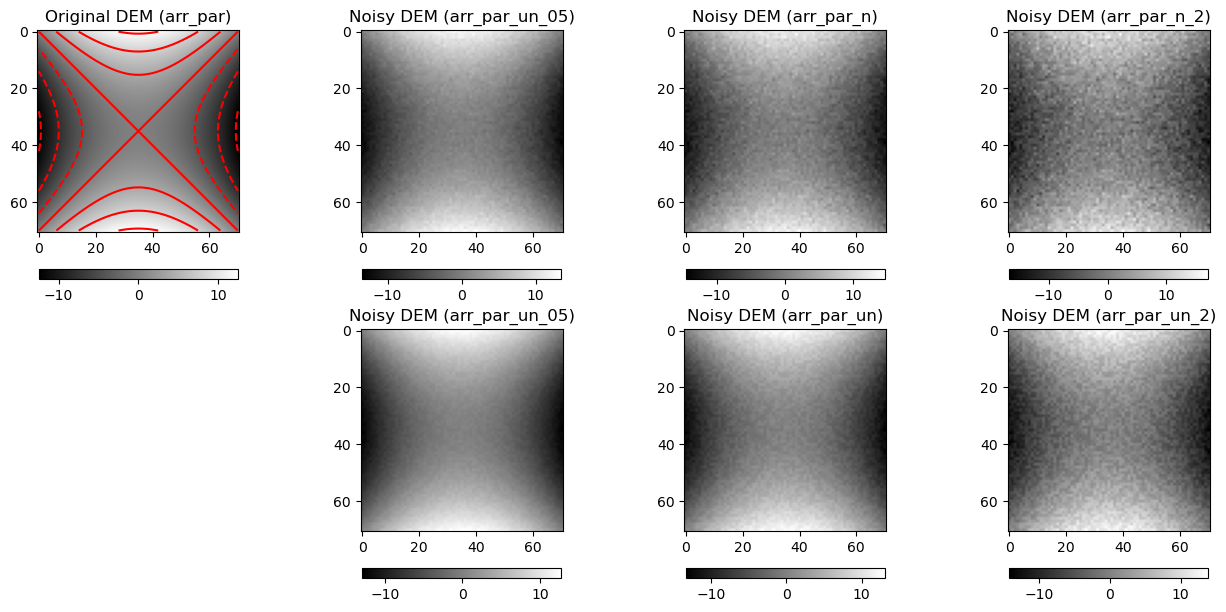

In [6]:
#Vis
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(3, 4, 1)
ax1.set_title('Original DEM (arr_par)')
plt.imshow(arr_par, cmap='binary_r')
plt.colorbar(fraction=0.04, orientation='horizontal')
plt.contour(arr_par, colors='red')

ax2 = fig.add_subplot(3, 4, 2)
ax2.set_title('Noisy DEM (arr_par_un_05)')
plt.imshow(arr_par_n_05, cmap='binary_r')
plt.colorbar(fraction=0.04, orientation='horizontal')

ax3 = fig.add_subplot(3, 4, 3)
ax3.set_title('Noisy DEM (arr_par_n)')
plt.imshow(arr_par_n, cmap='binary_r')
plt.colorbar(fraction=0.04, orientation='horizontal')

ax4 = fig.add_subplot(3, 4, 4)
ax4.set_title('Noisy DEM (arr_par_n_2)')
plt.imshow(arr_par_n_2, cmap='binary_r')
plt.colorbar(fraction=0.04, orientation='horizontal')

ax5 = fig.add_subplot(3, 4, 6)
ax5.set_title('Noisy DEM (arr_par_un_05)')
plt.imshow(arr_par_un_05, cmap='binary_r')
plt.colorbar(fraction=0.04, orientation='horizontal')

ax6 = fig.add_subplot(3, 4, 7)
ax6.set_title('Noisy DEM (arr_par_un)')
plt.imshow(arr_par_un, cmap='binary_r')
plt.colorbar(fraction=0.04, orientation='horizontal')

ax7 = fig.add_subplot(3, 4, 8)
ax7.set_title('Noisy DEM (arr_par_un_2)')
plt.imshow(arr_par_un_2, cmap='binary_r')
plt.colorbar(fraction=0.04, orientation='horizontal')

plt.savefig('vis_paraboloid.png')

plt.show()

In [7]:
# Saving the arrays as a geotiff files
# Jupyter Notebook must be run as administrator to be able to overwrite rasters

transform = rasterio.transform.from_origin(0, 0, 1, 1)
crs = rasterio.crs.CRS.from_epsg(4326)

data = arr_par

with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\clear\paraboloid_clear.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)
    
for _ in dict_np:
    data = dict_np[_]
    output_path = r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\\paraboloid" + _[3:] + ".tif"

    with rasterio.open(output_path, 
                       'w', 
                       driver='GTiff', 
                       width=data.shape[1], 
                       height=data.shape[0], 
                       count=1, 
                       dtype=str(data.dtype), 
                       crs=crs, 
                       transform=transform, 
                       overwrite=True) as dst:
        dst.write(data, 1)

C:\Users\sasha\anaconda3\envs\dem-filter\Lib\site-packages\rasterio\__init__.py:327: NotGeoreferencedWarning: The given matrix is equal to Affine.identity or its flipped counterpart. GDAL may ignore this matrix and save no geotransform without raising an error. This behavior is somewhat driver-specific.
  dataset = writer(


In [31]:
#inclined surface
# ax + by + cz + d = 0
# z = - (d+ax+by) / c


d = 10
a = 25
b = 25
c = 10

arr_inc = np.zeros((int(2*a)+1, int(2*b)+1), dtype = 'float')
nrows = arr_inc.shape[0]
ncols = arr_inc.shape[1]


for x in range(nrows):
    for y in range(ncols):
        z = (d + a * x + b * y) / c
        arr_inc[x][y] = z

In [21]:
# Noising
dict_ni = {}
arr_n = np.random.randn(nrows, ncols)  # normal distribution
arr_inc_n = arr_inc + arr_n
arr_inc_n_2 = arr_inc + arr_n * 2
arr_inc_n_05 = arr_inc + arr_n * 0.5

arr_un = np.random.uniform(-1, 1, (nrows, ncols))  # uniform distribution
arr_inc_un = arr_inc + arr_un
arr_inc_un_2 = arr_inc + arr_un * 2
arr_inc_un_05 = arr_inc + arr_un * 0.5

dict_ni['inc_n_1'], dict_ni['inc_n_05'], dict_ni['inc_n_2'], \
dict_ni['inc_un_1'], dict_ni['inc_un_05'], dict_ni['inc_un_2'] = \
arr_inc_n, arr_inc_n_05, arr_inc_n_2, arr_inc_un, arr_inc_un_05, arr_inc_un_2

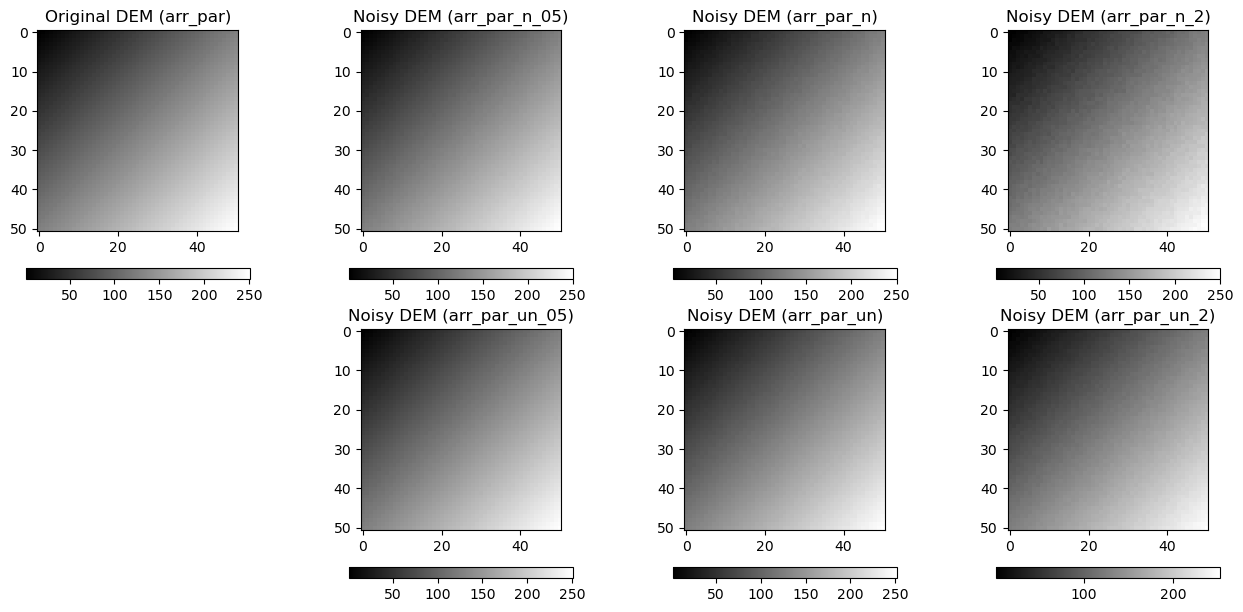

In [34]:
#Vis
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(3, 4, 1)
ax1.set_title('Original DEM (arr_par)')
plt.imshow(arr_inc, cmap='binary_r')
plt.colorbar(fraction=0.045, orientation='horizontal')
# plt.contour(arr_inc, colors='red')

ax2 = fig.add_subplot(3, 4, 2)
ax2.set_title('Noisy DEM (arr_par_n_05)')
plt.imshow(arr_inc_n_05, cmap='binary_r')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax3 = fig.add_subplot(3, 4, 3)
ax3.set_title('Noisy DEM (arr_par_n)')
plt.imshow(arr_inc_n, cmap='binary_r')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax4 = fig.add_subplot(3, 4, 4)
ax4.set_title('Noisy DEM (arr_par_n_2)')
plt.imshow(arr_inc_n_2, cmap='binary_r')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax5 = fig.add_subplot(3, 4, 6)
ax5.set_title('Noisy DEM (arr_par_un_05)')
plt.imshow(arr_inc_un_05, cmap='binary_r')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax6 = fig.add_subplot(3, 4, 7)
ax6.set_title('Noisy DEM (arr_par_un)')
plt.imshow(arr_inc_un, cmap='binary_r')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax7 = fig.add_subplot(3, 4, 8)
ax7.set_title('Noisy DEM (arr_par_un_2)')
plt.imshow(arr_inc_un_2, cmap='binary_r')
plt.colorbar(fraction=0.045, orientation='horizontal')
# plt.contour(arr_inc_un_2, colors='red')

plt.savefig('inclined_surface_fin.png')

plt.show()

In [30]:
# Saving the arrays as a geotiff files
# Jupyter Notebook must be run as administrator to be able to overwrite rasters

transform = rasterio.transform.from_origin(0, 0, 1, 1)
crs = rasterio.crs.CRS.from_epsg(4326)

data = arr_inc

with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\clear\inclined_clear.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)
    
for _ in dict_ni:
    data = dict_ni[_]
    output_path = r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\\inclined" + _[3:] + ".tif"

    with rasterio.open(output_path, 
                       'w', 
                       driver='GTiff', 
                       width=data.shape[1], 
                       height=data.shape[0], 
                       count=1, 
                       dtype=str(data.dtype), 
                       crs=crs, 
                       transform=transform, 
                       overwrite=True) as dst:
        dst.write(data, 1)

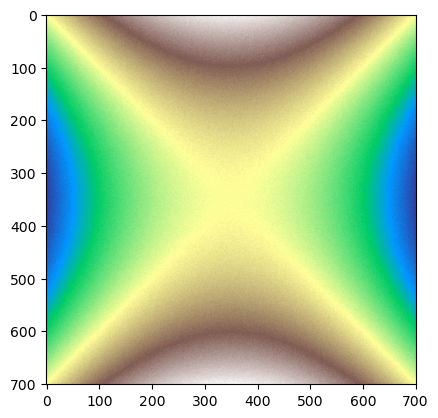

In [27]:
# Checking if the raster is saved correctly
with rasterio.open(r"C:/Users/sasha/abstract_surfaces/surfaces/noisy/paraboloid_un_05.tif", 'r') as ds:
    arr = ds.read()
    
plt.imshow(arr[0], cmap='terrain')
# plt.contourf(arr[0], cmap='terrain')
# plt.show()

In [25]:
# surfaces
# │   │   current_hemicylinder.tif
# │   │   current_hemisphere.tif
# │   │   current_inclined.tif
# │   │   current_paraboloid.tif
# │   │
# │   ├───clear
# │   │       hemicylinder_clear.tif
# │   │       hemisphere_clear.tif
# │   │       inclined_clear.tif
# │   │       inclined_surface_clear.tif
# │   │       paraboloid_clear.tif
# │   │
# │   └───noisy
# │           hemicylinder_n_05.tif
# │           hemicylinder_n_1.tif
# │           hemicylinder_n_2.tif
# │           hemicylinder_un_05.tif
# │           hemicylinder_un_1.tif
# │           hemicylinder_un_2.tif
# │           hemisphere_n_05.tif
# │           hemisphere_n_1.tif
# │           hemisphere_n_2.tif
# │           hemisphere_un_05.tif
# │           hemisphere_un_1.tif
# │           hemisphere_un_2.tif
# │           inclined_n_05.tif
# │           inclined_n_1.tif
# │           inclined_n_2.tif
# │           inclined_un_05.tif
# │           inclined_un_1.tif
# │           inclined_un_2.tif
# │           paraboloid_n_05.tif
# │           paraboloid_n_1.tif
# │           paraboloid_n_2.tif
# │           paraboloid_un_05.tif
# │           paraboloid_un_1.tif
# │           paraboloid_un_2.tif

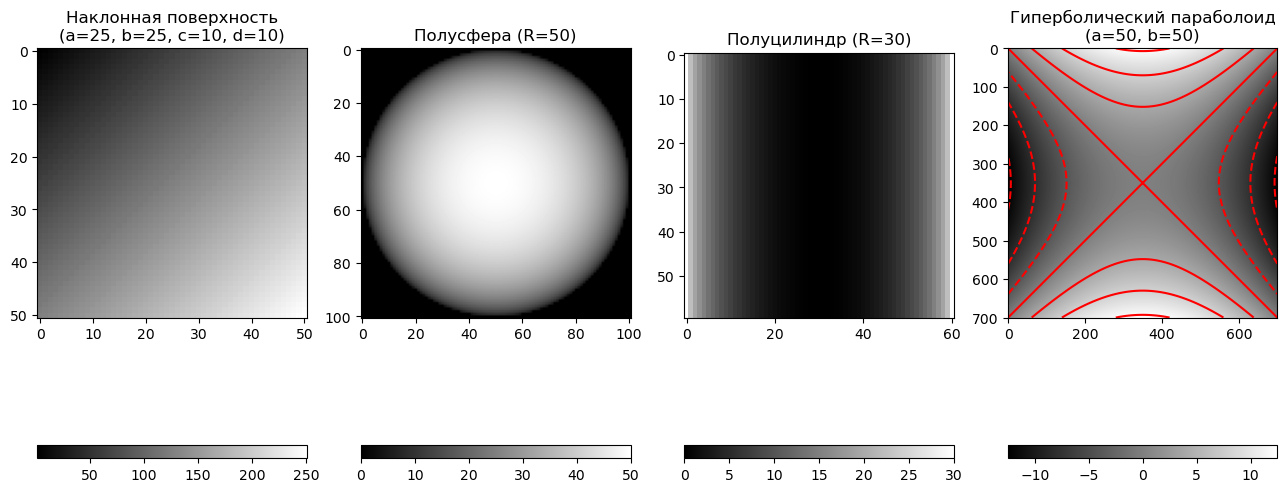

In [30]:
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(1, 4, 1)
ax1.set_title('Наклонная поверхность\n(a=25, b=25, c=10, d=10)')
plt.imshow(arr_inc, cmap='binary_r')
plt.colorbar(fraction=0.045, orientation='horizontal')
# plt.contour(arr_inc, colors='red')

ax2 = fig.add_subplot(1, 4, 2)
ax2.set_title('Полусфера (R=50)')
plt.imshow(arr_sph, cmap='binary_r')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax3 = fig.add_subplot(1, 4, 3)
ax3.set_title('Полуцилиндр (R=30)')
plt.imshow(arr_cyl, cmap='binary_r')
plt.colorbar(fraction=0.045, orientation='horizontal')

ax4 = fig.add_subplot(1, 4, 4)
ax4.set_title('Гиперболический параболоид\n(a=50, b=50)')
plt.imshow(arr_par, cmap='binary_r')
plt.colorbar(fraction=0.045, orientation='horizontal')
plt.contour(arr_par, colors='red')
# plt.contourf(arr_par, cmap='summer')

plt.savefig('result_vis.png')